In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import plotly as pl
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pygal
from pygal.maps.world import COUNTRIES
# Set notebook mode to work in offline
pyo.init_notebook_mode()
from main import *

In [2]:
preprocess(pd.read_csv('mmALL_073120_csv.csv'))

In [3]:
ogdata = pd.read_csv('mmALL_073120_csv.csv')

In [4]:
data = pd.read_csv('main_data.csv')

In [5]:
data = pd.read_csv('mmALL_073120_csv.csv')
px.treemap(data, path=['region', 'year'], values='protest')

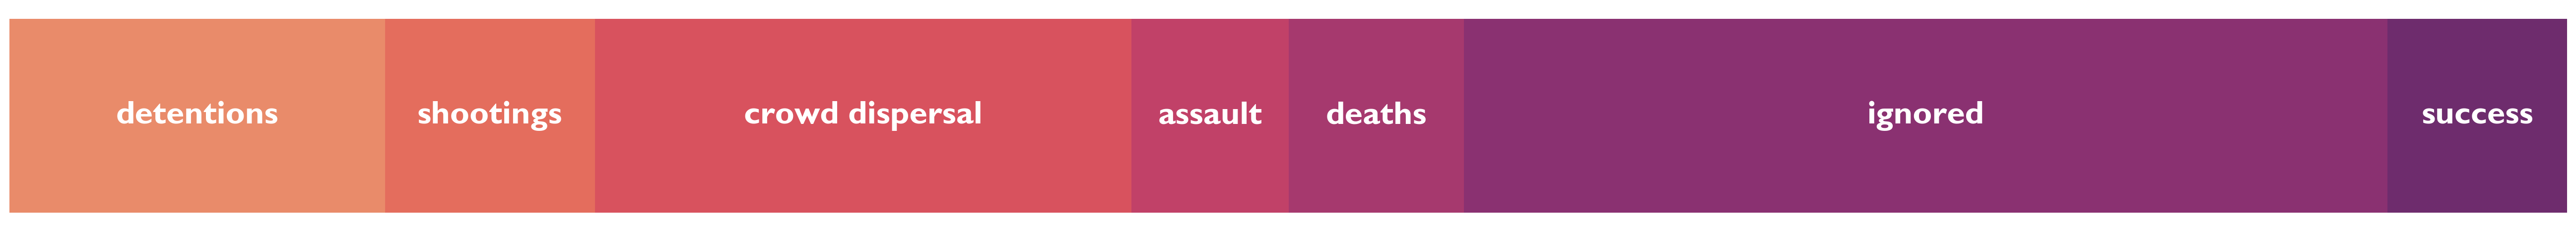

In [6]:
category_names2 = ['detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths', 'ignored', 'success']
results2 = {'': [2149, 1200, 3072, 900, 1000, 5285, 1027]}


def survey2(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('flare')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 3), dpi=190)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=25, fontweight='bold', fontname='Gill Sans MT')
    ax.axis('off')
    return fig, ax

survey2(results2, category_names2)
plt.show()

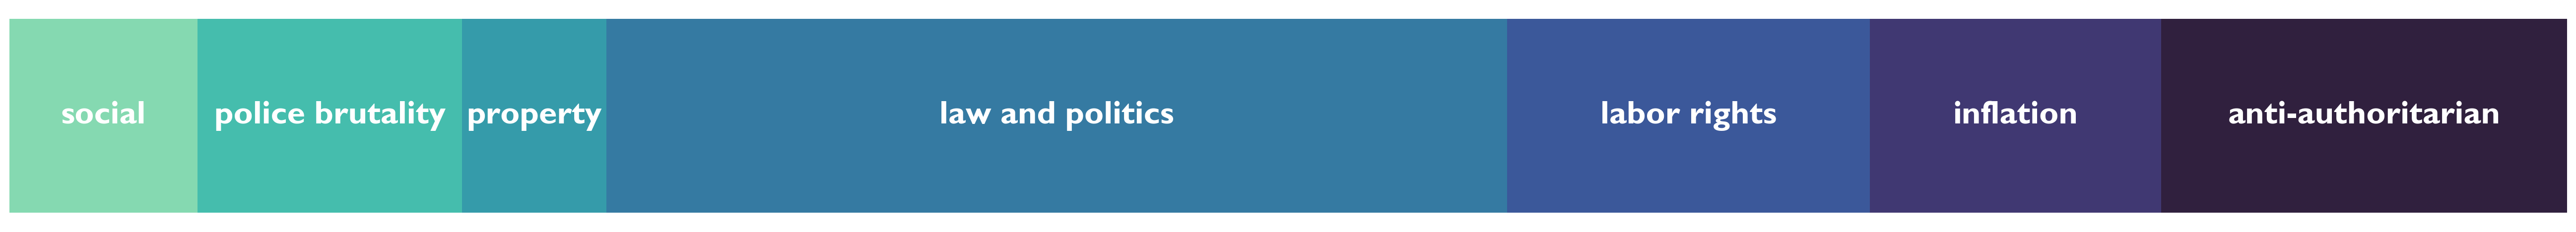

In [7]:
category_names2 = ['social', 'police brutality', 'property', 'law and politics', 'labor rights', 'inflation', 'anti-authoritarian']
results2 = {'': [784, 1101, 602, 3750, 1511, 1214, 1689]}

def survey2(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('mako_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 3), dpi=190)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=25, fontweight='bold', fontname='Gill Sans MT')

    ax.axis('off')
    return fig, ax


survey2(results2, category_names2)
plt.show()

In [8]:
data = pd.read_csv('main_data.csv')
MM = data[['country','reasons_social', 'reasons_policebrutality',
       'reasons_other', 'reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal', 'responses_accomodation',
       'responses_arrests', 'responses_shootings', 'responses_other',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']].groupby(['country']).sum().reset_index()
abc = MM.corr()
new = abc[['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal']].loc[['responses_accomodation',
       'responses_arrests', 'responses_shootings',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

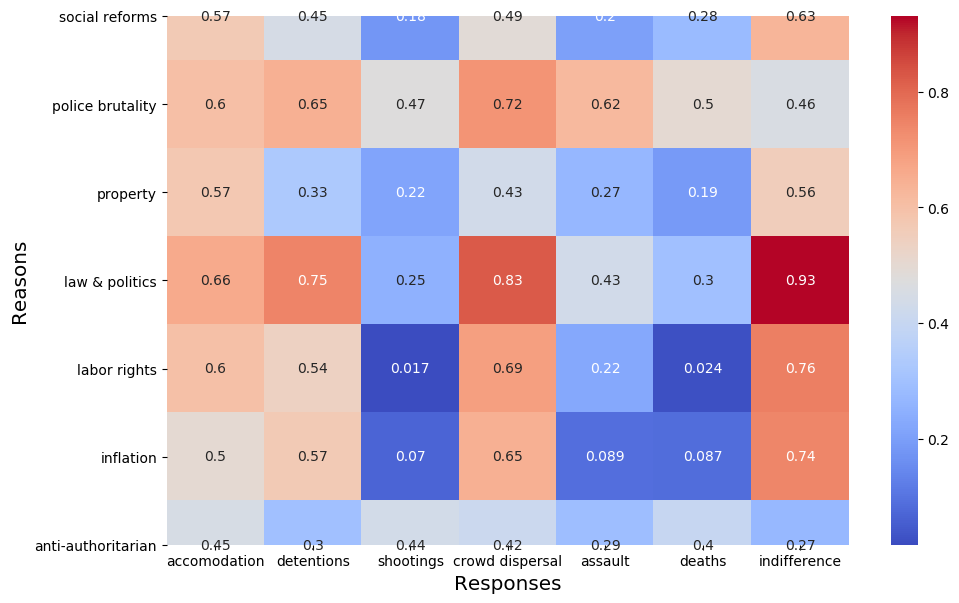

In [9]:
plt.figure(figsize = (11,7), dpi=100)
cmp = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(new.T, annot = True, cmap = cmp, cbar=True, xticklabels=['accomodation', 'detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths','indifference'], yticklabels=['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian'])

plt.ylabel('Reasons',fontsize='x-large')
plt.xlabel('Responses',fontsize='x-large')

plt.xticks(fontweight='roman')
plt.yticks(fontweight='roman')

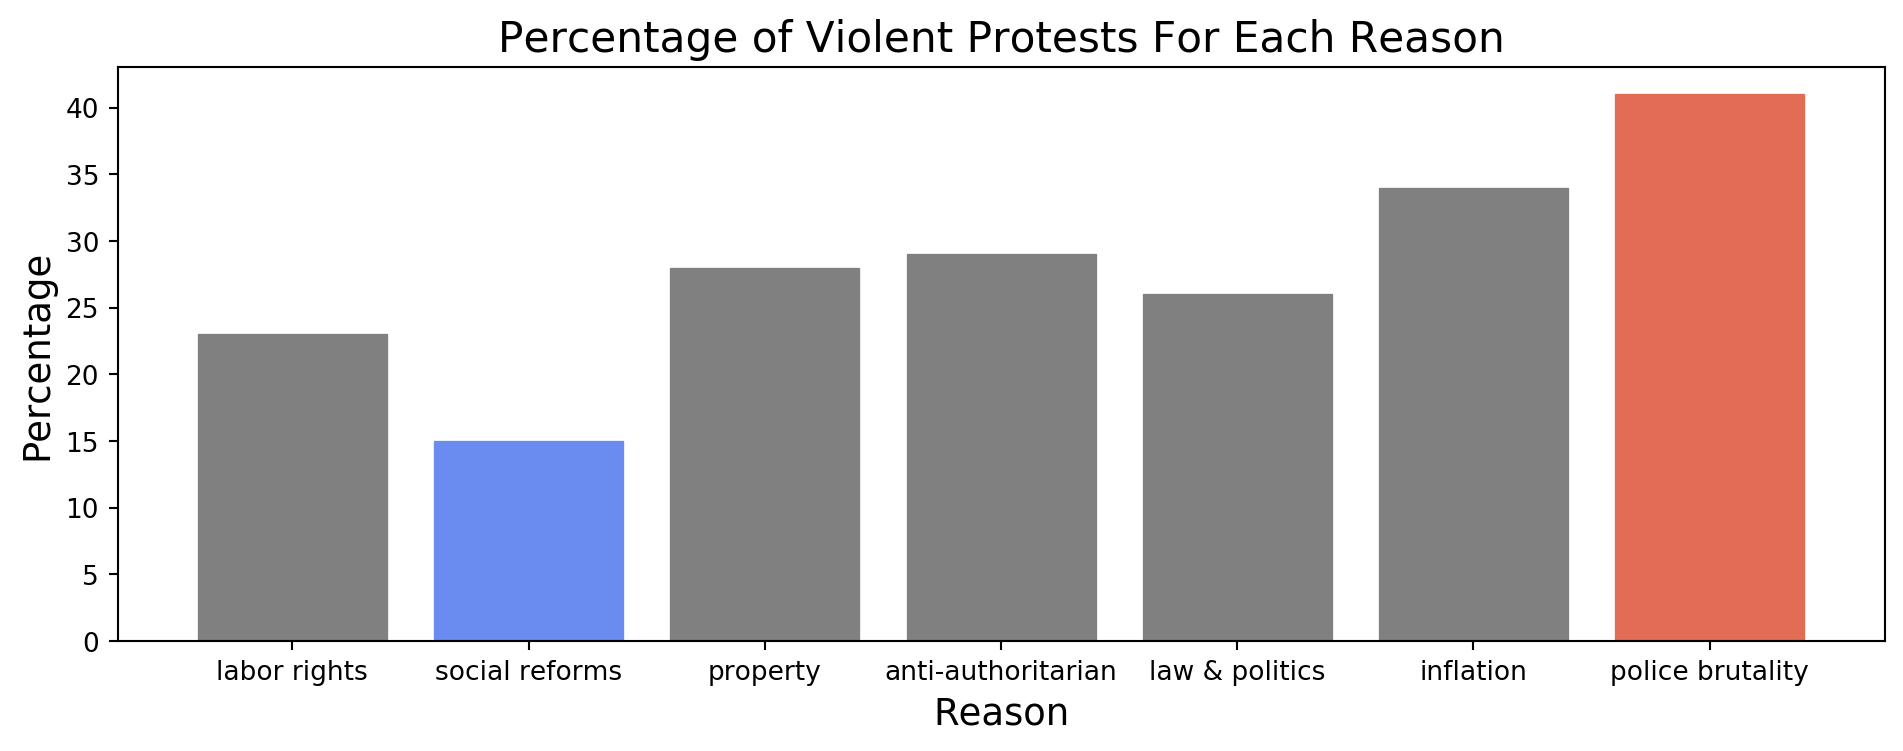

In [10]:
viol_percentage_line_plot(data)

C:\SPB_DATA\global-protests-analysis\main.py:243: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\SPB_DATA\global-protests-analysis\main.py:266: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\SPB_DATA\global-protests-analysis\main.py:285: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



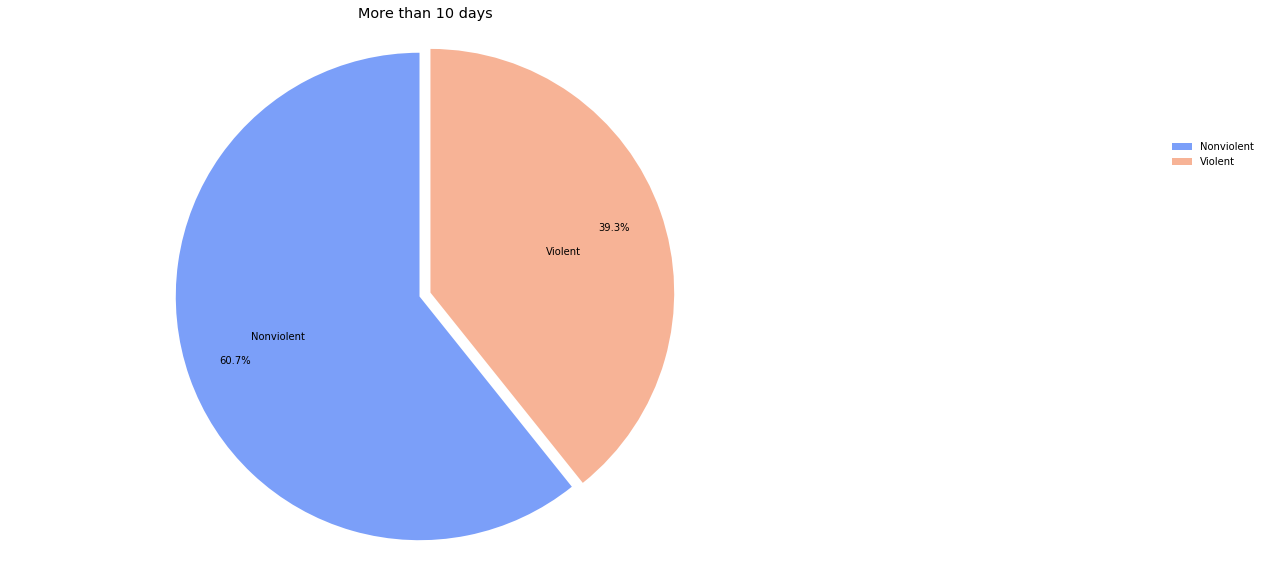

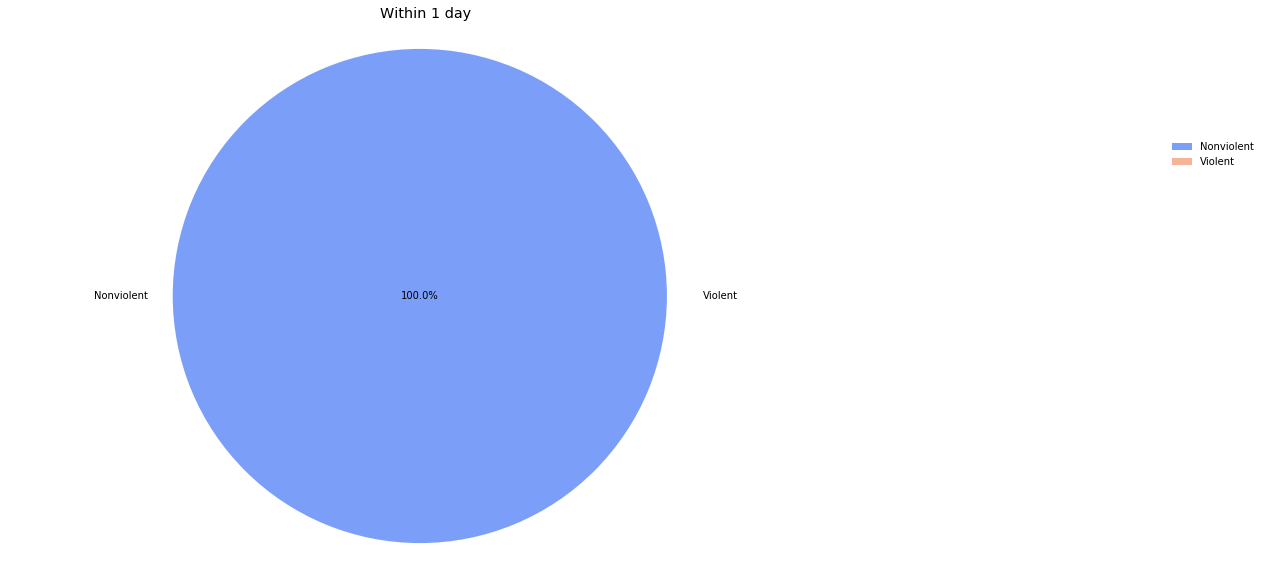

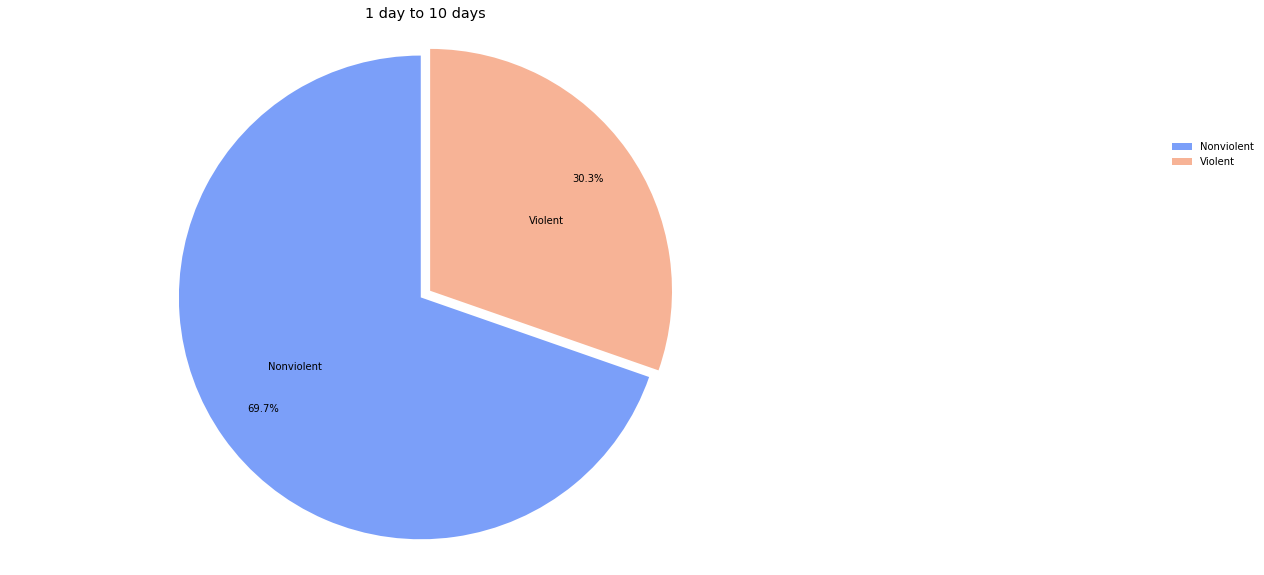

In [11]:
duration_and_violence(data)

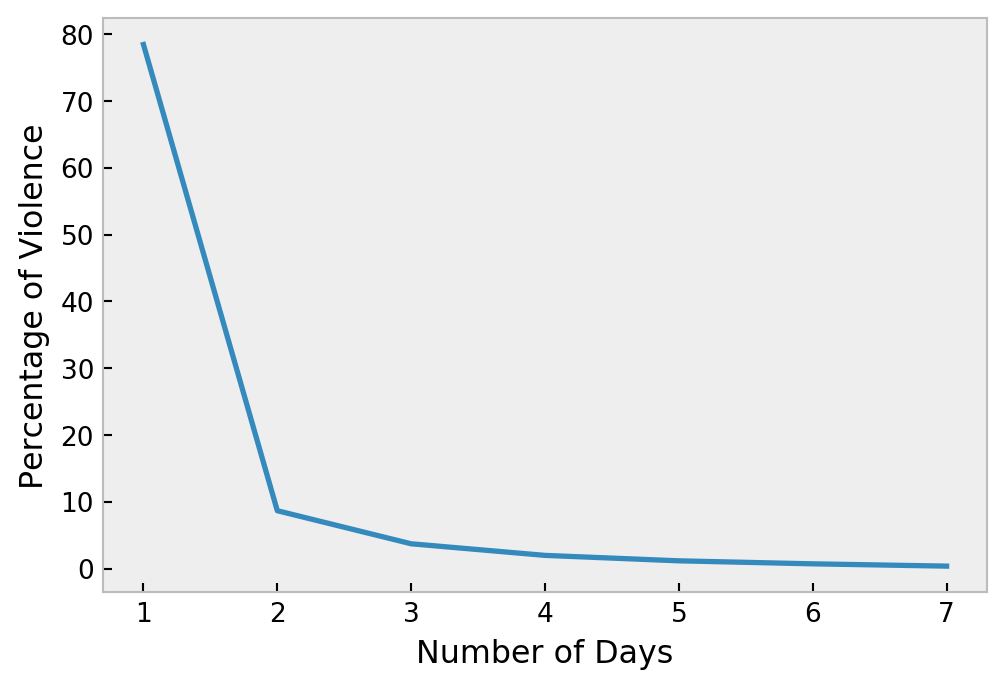

In [12]:
line_percent_violence_day(data)

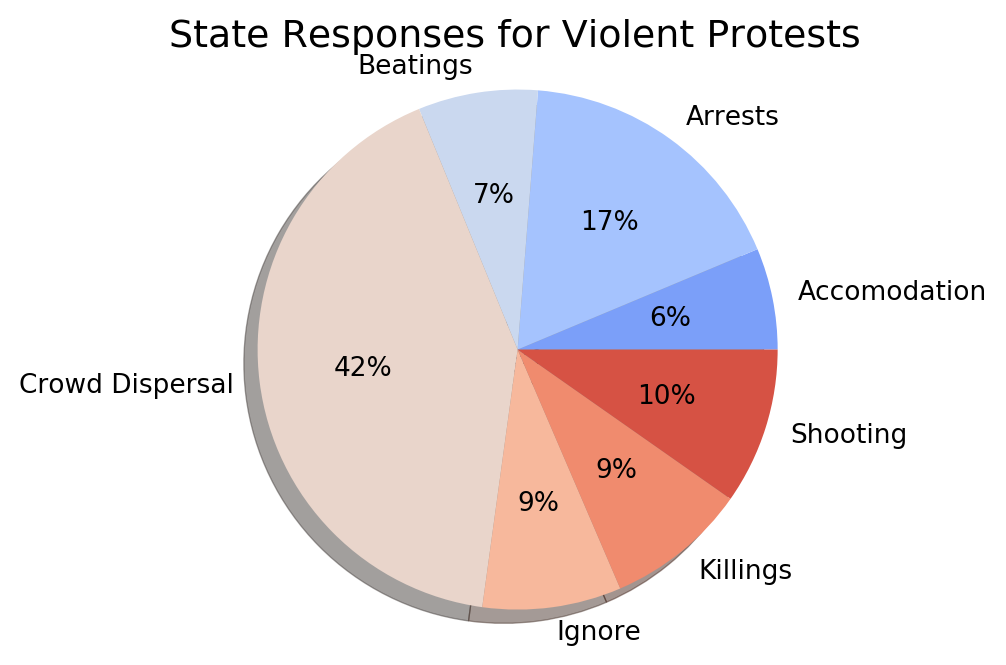

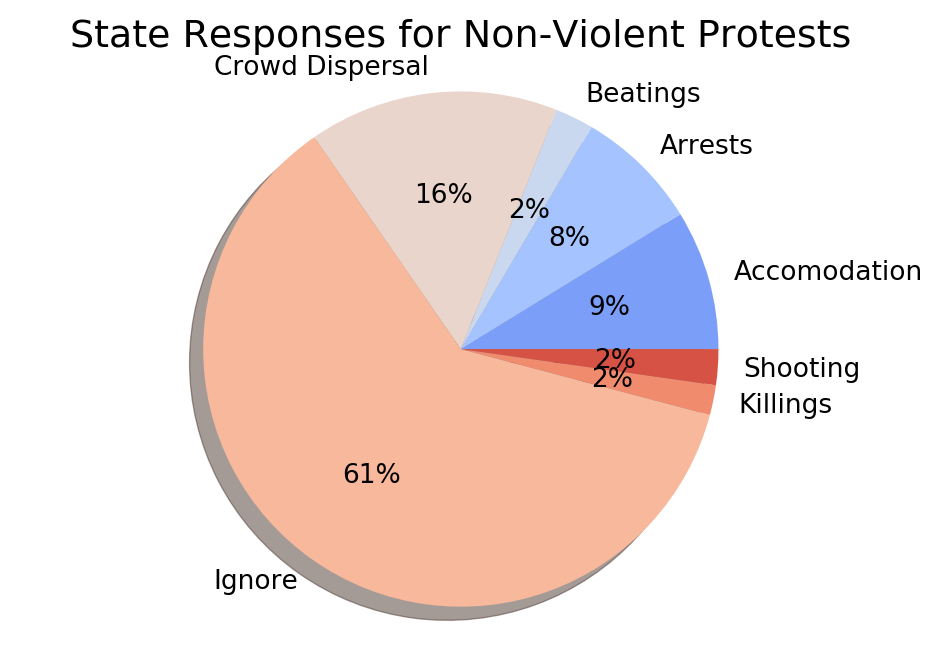

In [13]:
violance_response(data)

In [14]:
data['country'] = data['country'].replace(['United Arab Emirate'], 'United Arab Emirates')
data['country'] = data['country'].replace(['USSR'], 'Russia')
data['country'] = data['country'].replace(['Germany West','Germany East'], 'Germany')
data['country'] = data['country'].replace(['Yugoslavia'], 'Croatia')
data['country'] = data['country'].replace(['Czechoslovakia'], 'Slovakia')
data['country'] = data['country'].replace(['Bosnia'], 'Bosnia and Herzegovina')
data['country'] = data['country'].replace(['Serbia and Montenegro', 'Kosovo'], 'Serbia')
data['country'] = data['country'].replace(['Congo Kinshasa', 'Congo Brazzaville'], 'Congo')
data['country'] = data['country'].replace(['South Sudan', 'North Sudan'], 'Sudan')

In [15]:
tmp = data[['country','protest']].groupby('country').sum().sort_values('protest')

In [16]:
rev_map  = {v:k for k,v in COUNTRIES.items()}

In [17]:
mx_c = []
for x in tmp[-25:].iterrows():
    try:
        mx_c.append(rev_map[x[0]])
    except:
        pass
mx_c.append('us')

In [18]:
mn_c = []
for x in tmp[:25].iterrows():
    try:
        mn_c.append(rev_map[x[0]])
    except:
        pass

OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

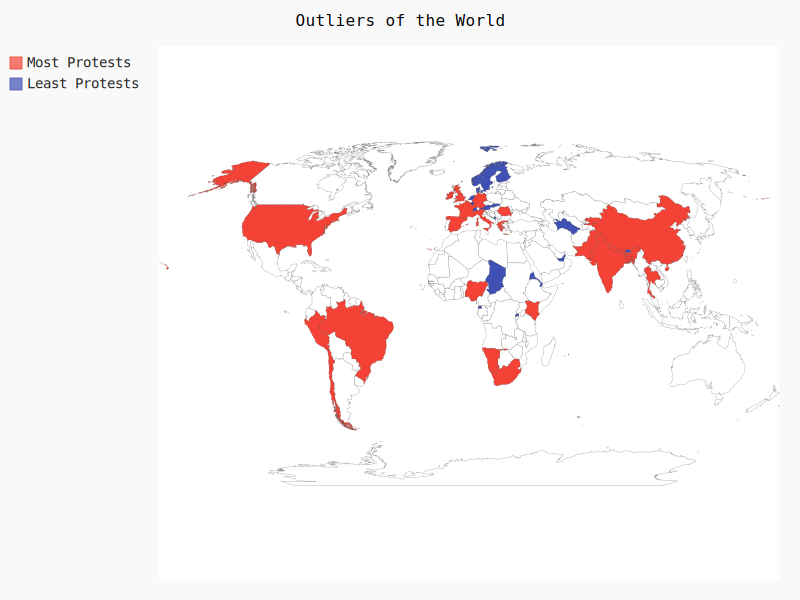

In [19]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Outliers of the World'
worldmap_chart.add('Most Protests', mx_c)
worldmap_chart.add('Least Protests', mn_c)

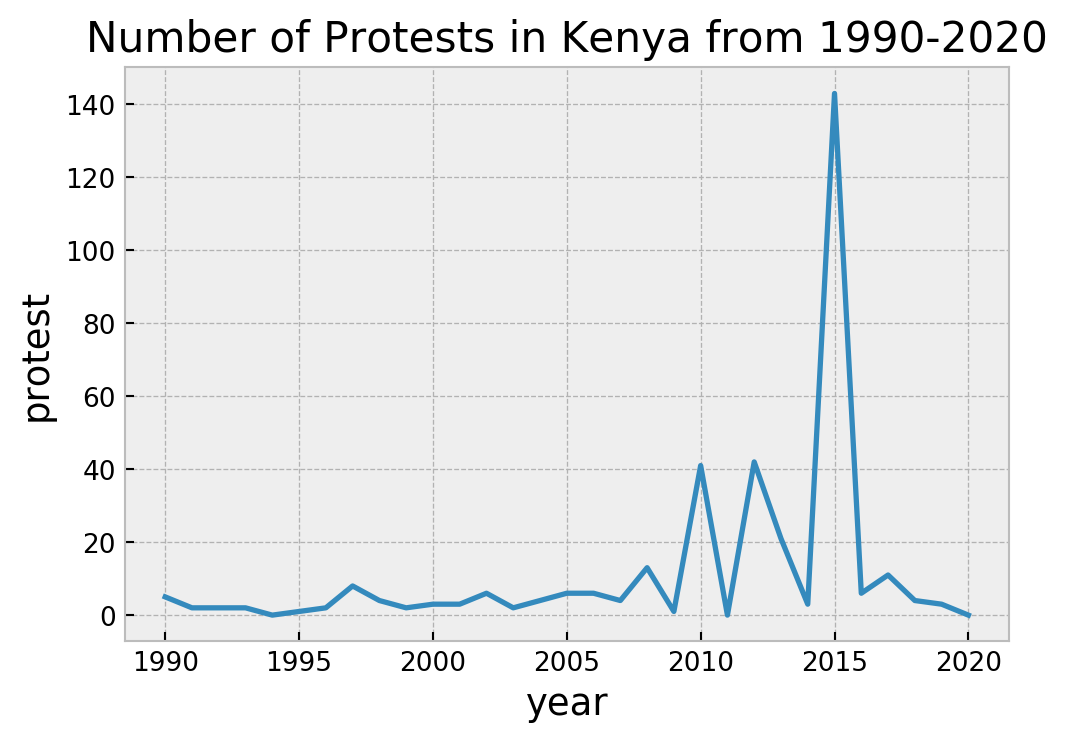

In [20]:
kenya_line_plot(data)

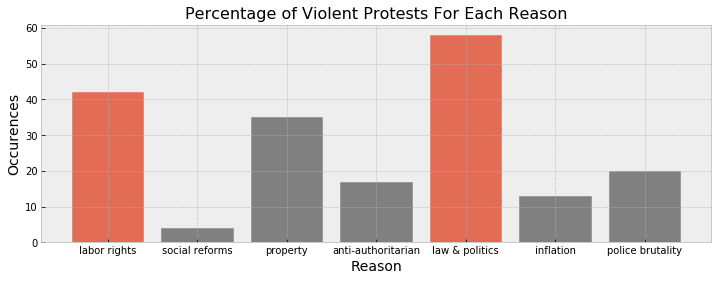

In [21]:
kenya_bar_plot(data)

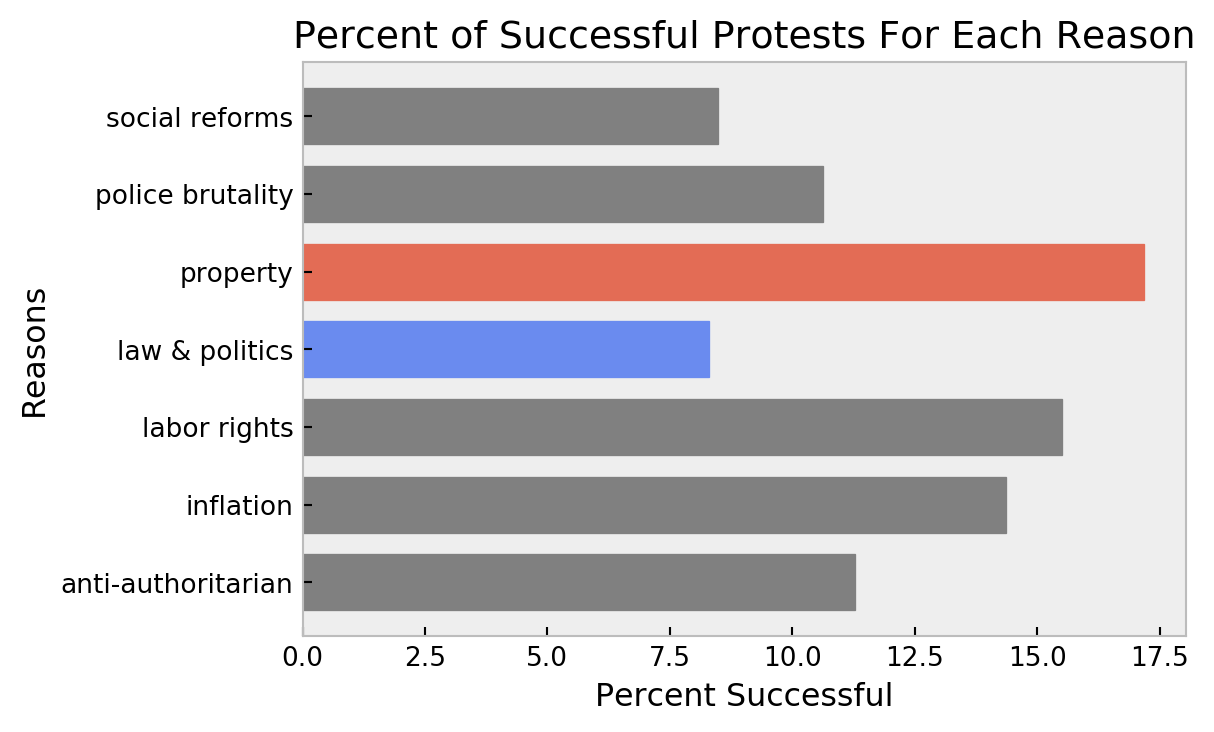

In [22]:
percent_per_reason_bar(data)

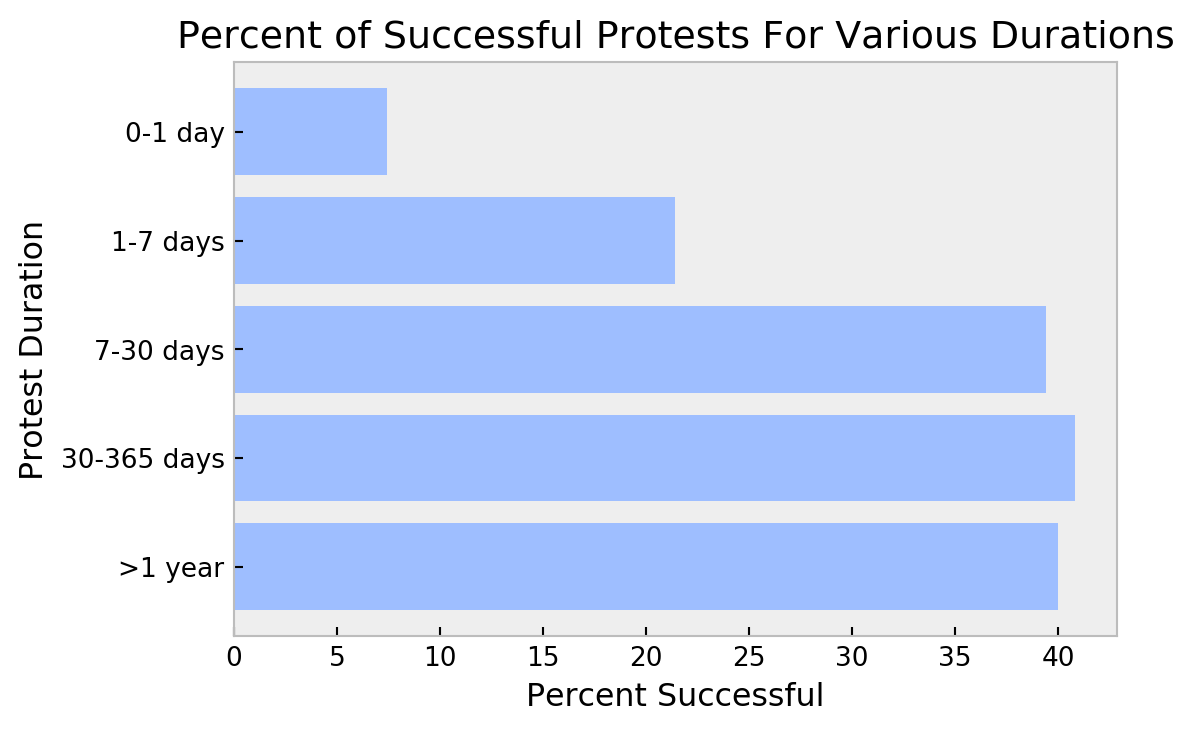

In [23]:
percent_per_duration_bar(data)

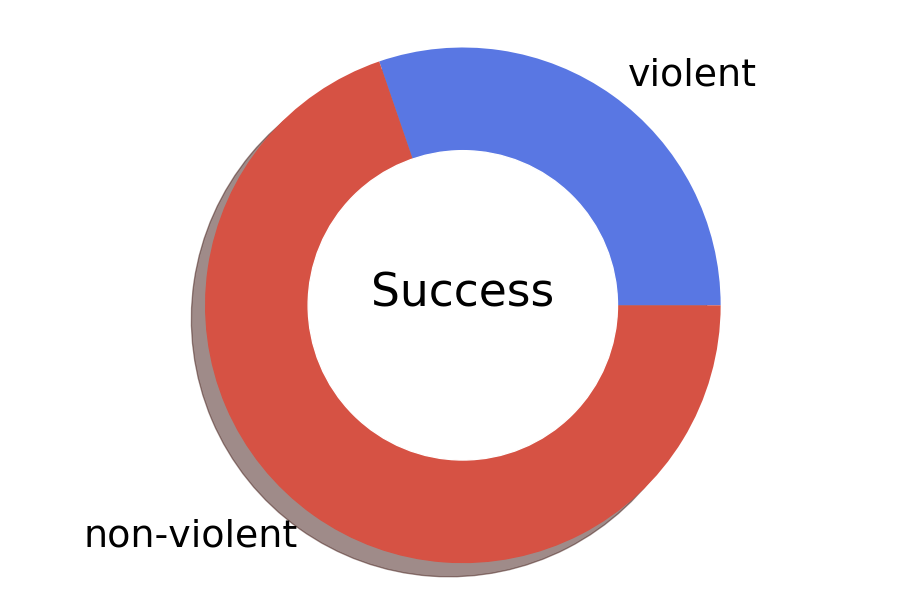

In [24]:
Idx = data['success']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(6,4), dpi=190)

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Success', ha='center', fontsize='xx-large')
plt.show()

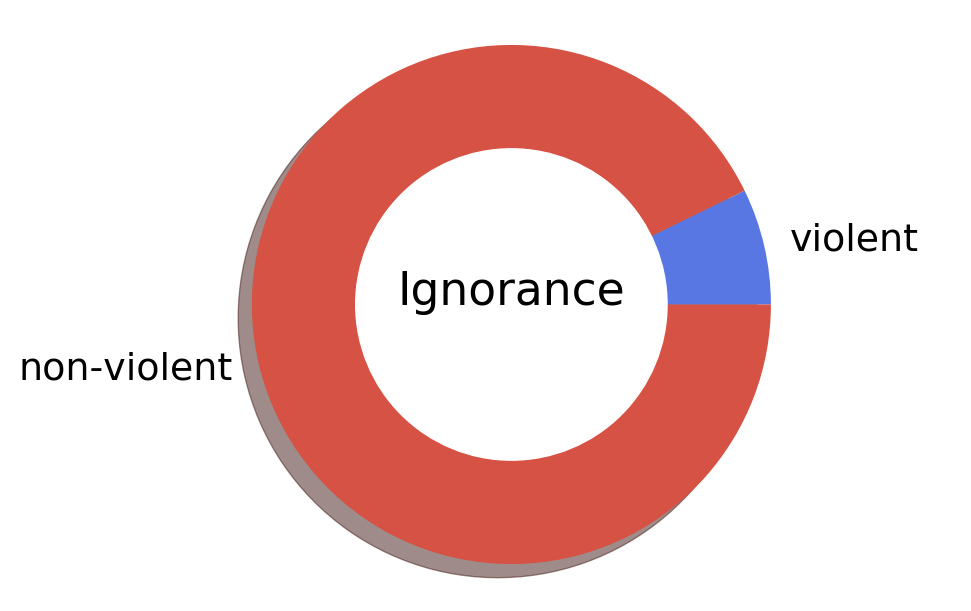

In [25]:
Idx = data['responses_ignore']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(6,4), dpi=190)

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Ignorance', ha='center', fontsize='xx-large')
plt.show()